**In this Project we first implement a vanilla Autoencoder, the network feature setting was adapt from the exercise2b , by doing so, I want to see, if it is possible to train a sufficient good vanilla Generator in exercise2b. the results turn out that is possible , so the reason that my GAN in exercise2b performs bad could be fogetting of images normalization between layers**

further we will try save model methods to save the model weights during trainning and record the loss , so after training, we backtrack the best epoch from min_loss or max_accuray . and use get model state function to get the best weight setting (the will be done in a duplicate of this file ) 

In [ ]:
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import torch.nn as nn
from torch.autograd import Variable
from torch import Tensor

# hyperparameters 

device = "cuda" if torch.cuda.is_available() else "cpu"
device


### Utility functions

In [ ]:
def show_images(images):
    # visualize an image
    images = np.reshape(images, [images.shape[0], -1])  # images reshape to (batch_size, D)
    sqrtn = int(np.ceil(np.sqrt(images.shape[0])))
    sqrtimg = int(np.ceil(np.sqrt(images.shape[1])))

    fig = plt.figure(figsize=(sqrtn, sqrtn))
    gs = gridspec.GridSpec(sqrtn, sqrtn)
    gs.update(wspace=0.05, hspace=0.05)

    for i, img in enumerate(images):
        ax = plt.subplot(gs[i])
        plt.axis('off')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_aspect('equal')
        plt.imshow(img.reshape([sqrtimg,sqrtimg]))
    return

def preprocess_img(x):
    # Normalize the image to be between [-1, 1]
    return ((x / 255.0) * 2) - 1

def deprocess_img(x):
    # Denormalize the image to be between [0, 255]
    return ((x + 1) / 2) * 255.0

### Read dataset

##### MNIST dataset 

- Hand written digit dataset
- 10 classes in total [0, 9]
- 60000 training images
- 10000 test images
- Grayscale images
- 28 $ \times $ 28 $ \times $ 1

In [ ]:
# You can change batch size according to your hardware  
#batch_size = 3   # default batch size
#batch_size = 256
batch_size = 64   

shuffle = True

transform_mnist = transforms.Compose([
                transforms.ToTensor()
                ])   # provided but actually makes task more diffcult so I removed it, : 


mnist_dataset_train = torchvision.datasets.MNIST('/tmp/mnist/data', 
                                            train=True, 
                                            download=True, 
                                            transform=transform_mnist)

mnist_dataset_test = torchvision.datasets.MNIST('/tmp/mnist/data', 
                                            train=False, 
                                            download=True, 
                                            transform=transform_mnist)

data_loader_train = torch.utils.data.DataLoader(mnist_dataset_train,
                                        batch_size=batch_size,
                                        shuffle=shuffle,
                                        num_workers=1)

data_loader_test = torch.utils.data.DataLoader(mnist_dataset_test,
                                        batch_size=1,
                                        shuffle=False,
                                        num_workers=1)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting /tmp/mnist/data/MNIST/raw/train-images-idx3-ubyte.gz to /tmp/mnist/data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting /tmp/mnist/data/MNIST/raw/train-labels-idx1-ubyte.gz to /tmp/mnist/data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting /tmp/mnist/data/MNIST/raw/t10k-images-idx3-ubyte.gz to /tmp/mnist/data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting /tmp/mnist/data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /tmp/mnist/data/MNIST/raw



torch.Size([64, 1, 28, 28])
torch.Size([64])
tensor(1.) tensor(0.)


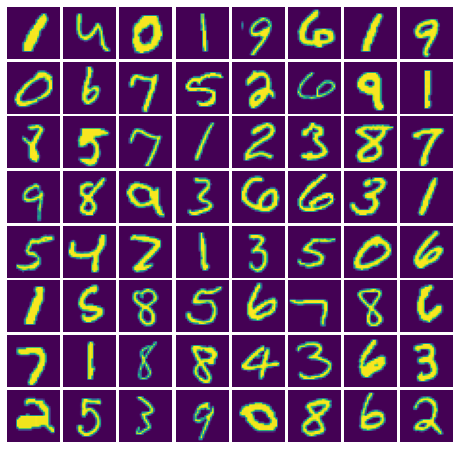

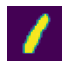

In [ ]:
sample = next(iter(data_loader_train))
print(sample[0].shape) # images
print(sample[1].shape) # labels

# Visualize a batch of images from the training set
show_images(sample[0])

# Visualize a single image from the batch
show_images(sample[0][0])
# show image pixel range ---> pixel value is not ranged from -1 to 1 or 0 to 1

print(torch.max(sample[0][0]),torch.min(sample[0][0]))





Model building 

In [ ]:



class Autoencoder(torch.nn.Module):
  def __init__(self,latent_dim=100,img_shape=(1,28,28)) -> None:
    super(Autoencoder, self).__init__()
    self.img_shape = img_shape
    self.encoder = nn.Sequential(        
        nn.Linear(np.prod(img_shape),1024),
        nn.ReLU(),
        nn.Linear(1024,1024),
        nn.ReLU(),
        nn.Linear(1024,latent_dim),
        nn.Tanh()
    )

    self.decoder = nn.Sequential(        
        nn.Linear(latent_dim,1024),
        nn.ReLU(),
        nn.Linear(1024,1024),
        nn.ReLU(),
        nn.Linear(1024,np.prod(img_shape))
    )


    
  def forward(self,x):
    x = x.view(x.shape[0],-1)
    x = self.encoder(x)
    output = self.decoder(x)
    return output.view(-1,*(self.img_shape))











In [ ]:
x = torch.zeros(3,*(1,28,28))
x =  x.view(x.shape[0],-1)
x.shape

torch.Size([3, 784])

# initialize model

In [ ]:

model_Autoencoder = Autoencoder().to(device)



##  optimizer & loss

In [ ]:
optimizer = torch.optim.Adam(model_Autoencoder.parameters(),lr=1e-3,weight_decay=0)
mse_loss = nn.MSELoss()




```
# 此内容为代码格式
```



#  Training 

In [ ]:
total_epoch = 2 
# save the reconstructed outputs
outputs = []  

for epoch in range(total_epoch):
  for i,(imgs, _) in enumerate(data_loader_train):
    imgs = imgs.to(device)
    optimizer.zero_grad()
    recon = model_Autoencoder(imgs)
    loss = mse_loss(recon,imgs)
    loss.backward()
    optimizer.step()
    print("[Batch %d/%d]  [ loss: %f]" % ( i, len(data_loader_train), loss.item()))
  print("[Epoch %d/%d] [Batch %d/%d]  [ loss: %f]" % (epoch+1,total_epoch, i, len(data_loader_train), loss.item()))
  outputs.append((epoch,imgs,recon))


  



# Plot reconstructed Results 

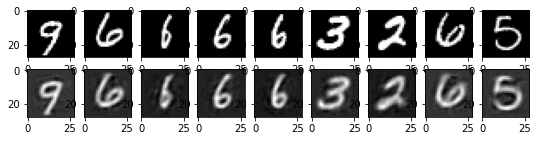

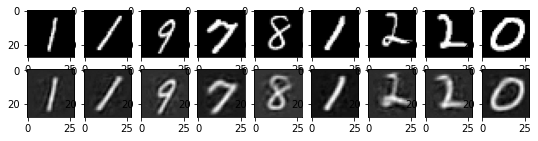

In [ ]:
for k in range(0,total_epoch,1):
  plt.figure(figsize=(9,2))
  plt.gray()
  imgs = Tensor.cpu(outputs[k][1].detach()).numpy()   #  detach() 
  recon = Tensor.cpu(outputs[k][2].detach()).numpy()

  for i, item in enumerate(imgs):
    if i >= 9: break
    plt.subplot(2,9, i+1)
    plt.imshow(item[0])
    


  for i, item in enumerate(recon):
    if i >= 9: break
    plt.subplot(2,9, 9+i+1)
    plt.imshow(item[0])
    


# wipe learned weights

In [ ]:
for layer in model_Autoencoder.children():
  if hasattr(layer, 'reset_parameters'):
       layer.reset_parameters()




```
# 此内容为代码格式
```

